In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [3]:
dataset = pd.read_csv("Melbourne_housing_FULL.csv")
dataset2 = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [4]:
dataset.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [5]:
dataset2.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [6]:
# Veri kümesinin şekli (satır sayısı, sütun sayısı) 
shape = dataset.shape
print(shape)

(34857, 21)


In [7]:
# Sütun sayısı
column_count = dataset.shape[1]
print(column_count)

21


In [8]:
# Boyut
size = dataset.size
print(size)

731997


In [9]:
dataset_info = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [10]:
# Veri kümesinin betimsel istatistikleri
descriptive_stats = dataset.describe()
print(descriptive_stats)

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [11]:
#değişken olan nesneleri kategoriye çevirme
categorical_columns = dataset.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [12]:
# Yinelemeleri kontrol etme
duplicated_rows = dataset.duplicated()
print(duplicated_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
34852    False
34853    False
34854    False
34855    False
34856    False
Length: 34857, dtype: bool


In [13]:
# Yinelemeli verileri temizleme
dataset = dataset.drop_duplicates()
print(dataset)

           Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.

In [14]:
# Z-skorları hesaplayın BuildingArea and Landsize
z_scores_Landsize = np.abs((dataset['Landsize'] - dataset['Landsize'].mean()) / dataset['Landsize'].std())
z_scores_BuildingArea = np.abs((dataset['BuildingArea'] - dataset['BuildingArea'].mean()) / dataset['BuildingArea'].std())

In [15]:
# Aykırı verileri tespit etmek için bir eşik değeri belirleyin
threshold = 3

In [16]:
# Aykırı verilerin indekslerini bulun
outliers_Landsize = np.where(z_scores_Landsize > threshold)
outliers_BuildingArea = np.where(z_scores_BuildingArea > threshold)

In [17]:
# Landsize ve BuildingArea değişkenlerindeki aykırı verileri temizle
dataset = dataset[(z_scores_Landsize <= threshold) & (z_scores_BuildingArea <= threshold)]

In [18]:
#Eksik verileri bulur ve temizler ve 'Bathroom' ve 'Car' değişkeninin modu ile doldurur

categorical_missing = ['Bathroom', 'Car',"Price", "Landsize", "BuildingArea", "YearBuilt"]
for column in categorical_missing:
    dataset[column] = dataset[column].fillna(dataset[column].mode().iloc[0])

In [19]:
dataset.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,600000.0,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
12,Abbotsford,121/56 Nicholson St,2,u,600000.0,PI,Biggin,7/11/2016,2.5,3067.0,...,2.0,1.0,4292.0,82.0,2009.0,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,4019.0
13,Abbotsford,17 Raphael St,4,h,600000.0,W,Biggin,7/11/2016,2.5,3067.0,...,2.0,0.0,230.0,147.0,1860.0,Yarra City Council,-37.8066,144.9936,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019.0
20,Abbotsford,2 Rich St,2,h,600000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,1.0,1.0,176.0,80.0,1925.0,Yarra City Council,-37.7998,144.9972,Northern Metropolitan,4019.0


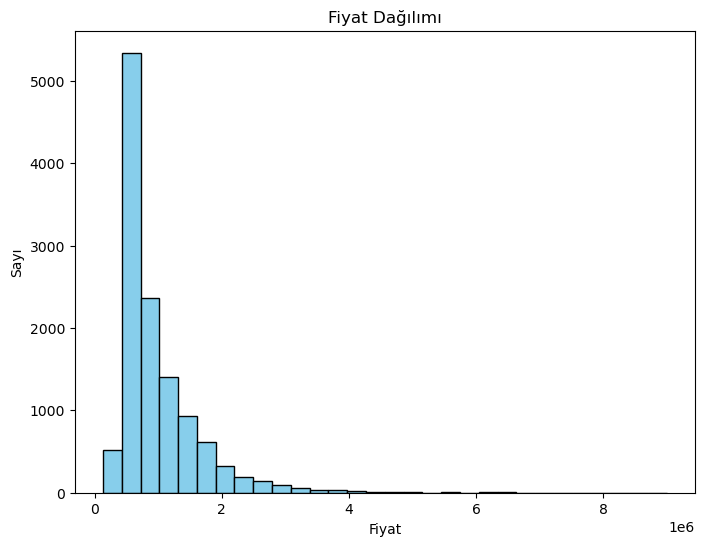

In [20]:
# Fiyat verisini histogram olarak görselleştirme
plt.figure(figsize=(8, 6))
plt.hist(dataset['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.show()

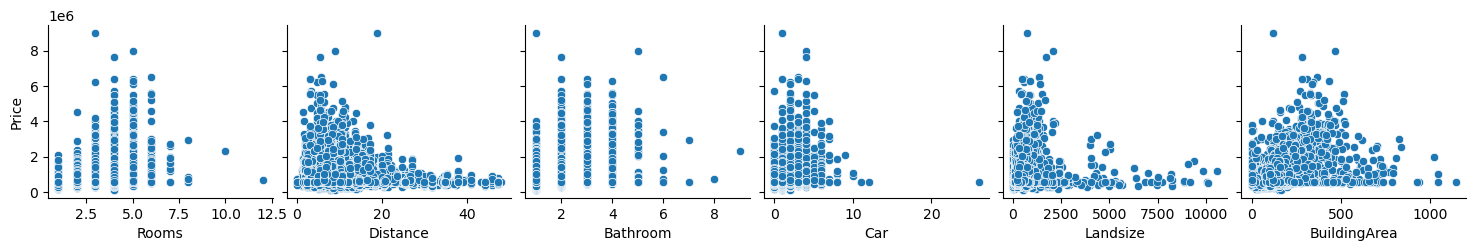

In [21]:
# Tüm sayısal değişkenler ile fiyat arasındaki ilişkiyi gösteren çift grafik
sns.pairplot(dataset, x_vars=['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'], y_vars=['Price'])
plt.show()

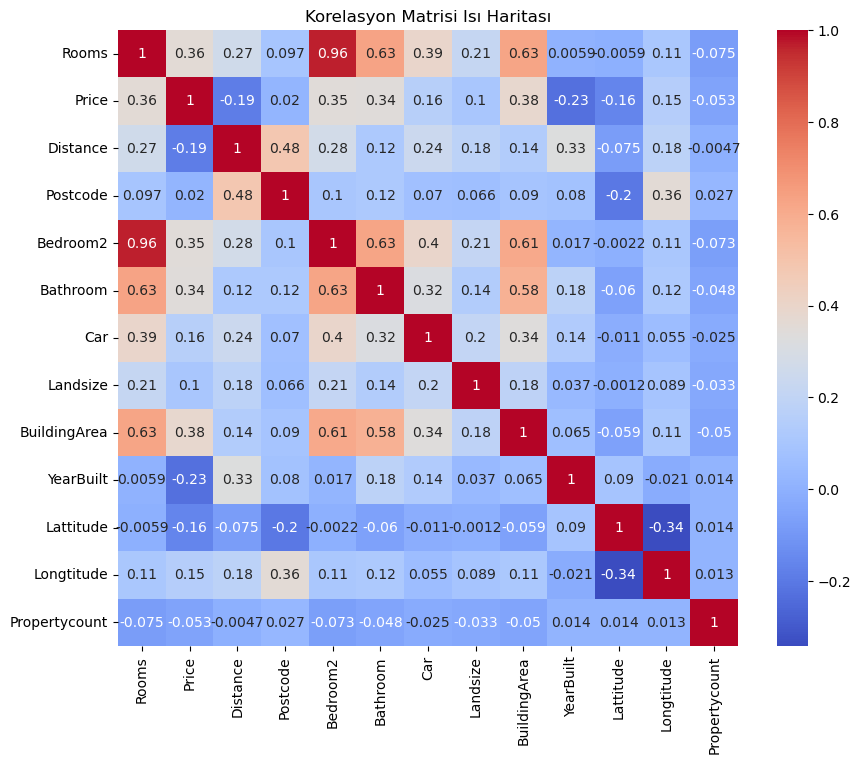

In [22]:
# Korelasyon matrisini hesapla
correlation_matrix = dataset.corr(numeric_only=True)

# Isı haritası ile korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Kategorik sütunlar listesi
#categorical_columns = ['Suburb', 'Address', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

# Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column + '_encoded'] = label_encoder.fit_transform(dataset[column])

# One-Hot Encoding
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(dataset[categorical_columns])

# One-Hot Encoding sonuçlarını bir DataFrame'e dönüştürün ve sütun adlarını ekleyin
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Sonucu veri çerçevesine ekleyin
dataset = pd.concat([dataset, onehot_encoded_df], axis=1)

# Artık orijinal kategorik sütunları kaldırabiliriz
dataset = dataset.drop(categorical_columns, axis=1)

In [24]:
dataset.head(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,4.0,600000.0,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,3.0,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2.0,600000.0,2.5,3067.0,2.0,2.0,1.0,4292.0,82.0,2009.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,4.0,600000.0,2.5,3067.0,6.0,2.0,0.0,230.0,147.0,1860.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,2.0,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,2.0,1097000.0,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2.0,600000.0,2.5,3067.0,2.0,1.0,1.0,176.0,80.0,1925.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = dataset.drop('Price', axis=1)  # Fiyat sütununu çıkarın, geri kalanlar X
y = dataset['Price']  # Fiyat sütunu y

In [26]:
#Veriyi eğitim ve test kümelerine bölüyoruz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

#modellerin sözlüğünü oluşturun

models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

In [28]:
dataset.head(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,4.0,600000.0,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,3.0,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2.0,600000.0,2.5,3067.0,2.0,2.0,1.0,4292.0,82.0,2009.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,4.0,600000.0,2.5,3067.0,6.0,2.0,0.0,230.0,147.0,1860.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,2.0,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,2.0,1097000.0,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2.0,600000.0,2.5,3067.0,2.0,1.0,1.0,176.0,80.0,1925.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#veri çerçevesindeki NaN değerleri bulma
NaN_degerler = dataset.isna().sum()
print(NaN_degerler)

Rooms                                    6714
Price                                    6714
Distance                                 6714
Postcode                                 6714
Bedroom2                                 6714
                                         ... 
Regionname_Northern Victoria             6714
Regionname_South-Eastern Metropolitan    6714
Regionname_Southern Metropolitan         6714
Regionname_Western Metropolitan          6714
Regionname_Western Victoria              6714
Length: 12643, dtype: int64


In [30]:
dataset.head(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,4.0,600000.0,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,3.0,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2.0,600000.0,2.5,3067.0,2.0,2.0,1.0,4292.0,82.0,2009.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,4.0,600000.0,2.5,3067.0,6.0,2.0,0.0,230.0,147.0,1860.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,2.0,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,2.0,1097000.0,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2.0,600000.0,2.5,3067.0,2.0,1.0,1.0,176.0,80.0,1925.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Eksik verileri ortalama ile doldurma
ortalama_degerler = dataset.mean()
dataset.fillna(ortalama_degerler, inplace=True)

In [81]:
random_20_rows = dataset.sample(10)
random_20_rows

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
11523,3.13735,9.824874e+05,11.041123,3114.873463,3.112753,1.681469,1.709451,496.538093,153.906558,1963.862319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000
34281,3.00000,1.633000e+06,7.300000,3146.000000,3.000000,2.000000,3.000000,604.000000,143.000000,1948.000000,...,0.037722,0.002394,0.114899,0.006026,0.280066,0.006356,0.04416,0.332645,0.211308,0.00454
509,3.13735,9.824874e+05,11.041123,3114.873463,3.112753,1.681469,1.709451,496.538093,153.906558,1963.862319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000
9863,3.13735,9.824874e+05,11.041123,3114.873463,3.112753,1.681469,1.709451,496.538093,153.906558,1963.862319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000
1992,2.00000,1.780000e+06,10.700000,3187.000000,4.000000,3.000000,2.000000,635.000000,119.000000,1935.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000
10865,2.00000,1.000000e+06,7.000000,3013.000000,2.000000,1.000000,1.000000,220.000000,105.000000,1910.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000
6685,1.00000,4.320000e+05,2.800000,3000.000000,1.000000,1.000000,1.000000,0.000000,51.000000,2005.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000
30886,4.00000,6.200000e+05,14.700000,3030.000000,4.000000,2.000000,2.000000,630.000000,235.000000,1995.000000,...,0.037722,0.002394,0.114899,0.006026,0.280066,0.006356,0.04416,0.332645,0.211308,0.00454
31378,3.00000,4.700000e+05,14.700000,3030.000000,3.000000,1.000000,2.000000,560.000000,115.000000,1975.000000,...,0.037722,0.002394,0.114899,0.006026,0.280066,0.006356,0.04416,0.332645,0.211308,0.00454
3398,3.13735,9.824874e+05,11.041123,3114.873463,3.112753,1.681469,1.709451,496.538093,153.906558,1963.862319,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000


In [83]:
price_dtype = dataset['Price'].dtype
print(price_dtype)

float64


In [88]:
from sklearn.impute import SimpleImputer

# Eksik verileri doldurun
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [94]:
imputer = SimpleImputer(strategy='mean')
y_train = y_train.to_numpy().reshape(-1, 1)  # y_train'i NumPy dizisine dönüştürün ve 2D bir diziye dönüştürün
y_train = imputer.fit_transform(y_train)

In [ ]:
for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)

In [80]:
from sklearn.metrics import mean_squared_error

for model_name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} MSE: {mse}')

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values